# Fundamentals of ecology

### What is ecology?
The study of interactions that take place between organisms and their environment. It explains how living organisms affect each other and the world they live in.

### Important elements in Ecology

- Habitat & Niche: Habitat is the physical place where a plant or an animal lives. Niche is an organism’s total way of life (pattern of living).

- The Nonliving Environment: Abiotic factors are the nonliving parts of an organism’s environment (Aircurrents,temperature,moisture,light,andsoil,...). Abiotic factors affect an organism’s life.

- The Living Environment: Biotic factors are all the living organisms that inhabit an environment. All organisms depend on others directly or indirectly for food, shelter, reproduction, or protection.

### Levels of organization in Ecology
Ecologists have organized the interactions an organism takes part in into different levels according to complexity. 
- Organism: An individual living thing that is made of cells, uses energy, reproduces, responds, grows, and develops.
- Population: A group of organisms, all of the same species, which interbreed and live in the same place at the same time.
- Ecosystem: Populations of plants and animals that interact with each other in a given area with the abiotic components of that area (terrestrial or aquatic).

### Scope of Ecology
Ecology is the scientific study of the interactions between organisms and their environment. Main themes:
- Where do organisms live and why?
- How many organisms are present and why?
- How is going to evolve the number of organisms and why?

### Ecology and Evolution
Ecology and evolutionary biology are closely related sciences. Events that occur in the framework of ecological time (minutes, days, years) translate into effects over evolutionary time (decades, millennia). For example, hawks feeding on mice impact mouse population and may eventually lead to selection for mice with fur as camouflage, or to the extinction of the mice population



### Predictive Ecology
Ecology has an additional theoretical perspective, that tries to understand the future evolution of an ecosystem, given its environment and/or the relation between the different population that compose. It's mportant for different reasons knowing the stability of an ecosystem:
- How much predation can a population sustain before disappearing (going extinct)?
- How much fishery/hunting can a population sustain?
- What happens to an ecosystem when one species disappears?
- Example: If we remove all the spiders from a given ecosystem, the insect population will grow rapidly and can destroy forests and crops.

Theoretical ecology is a complex subject. In order to make predictions, one must take into account many factors, both biotic and abiotic:
- Death and birth rates (by natural causes) of the different populations 
- Relations with the environment, favorable/unfavorable to the reproduction of a species 
- Relations between different species: predation, parasitism, symbiosis, ...

Particularly important are the relations between different species. All parts of an ecosystem are interrelated, and each part is affected by all other parts. If we remove one species from an ecosystem, there could be severe consequences for that ecosystem. If one prey disappears, its predator can also disappear: Network structure of the ecosystem.

### Models in theoretical Ecology
Our understanding of theoretical ecology is based in the consideration and analysis of different models. Models are of course very strong simplifications of what happens in nature, but something can be learned from them nonetheless. Models in ecology can deal with different aspects:
- Dynamics of a single population (species)
- Dynamics of a small set of species (ex. predators and preys) 
- Dynamics of full ecosystems of many species

Can also have different levels of resolution:
- Sex
- Differentiate the age of individuals in each populations

### Classification of models in Ecology
Continuous time models: Defined in terms of differential equations or continuous time stochastic models (sequential update). Imply a continuous overlap of generations.

$$\frac{dN(t)}{dt} = F(N)$$


Discrete time models: Defined in terms of difference equations or discrete time models (parallel update). Implies a clear separation of generations. The time interval between generations can be different for different species.

$$N_{t+1} = F(N_t)$$

# Continous Time Models

### Simple continuous time model

Conservation equation for a single population:

$$\frac{dN}{dt} = births - deaths + migration$$

Simplest model assumes no migration and births and deaths proportional to the
size of the population:

$$\frac{dN}{dt} = bN-dN \longrightarrow N(t)=N_0e^{(b-d)t}$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

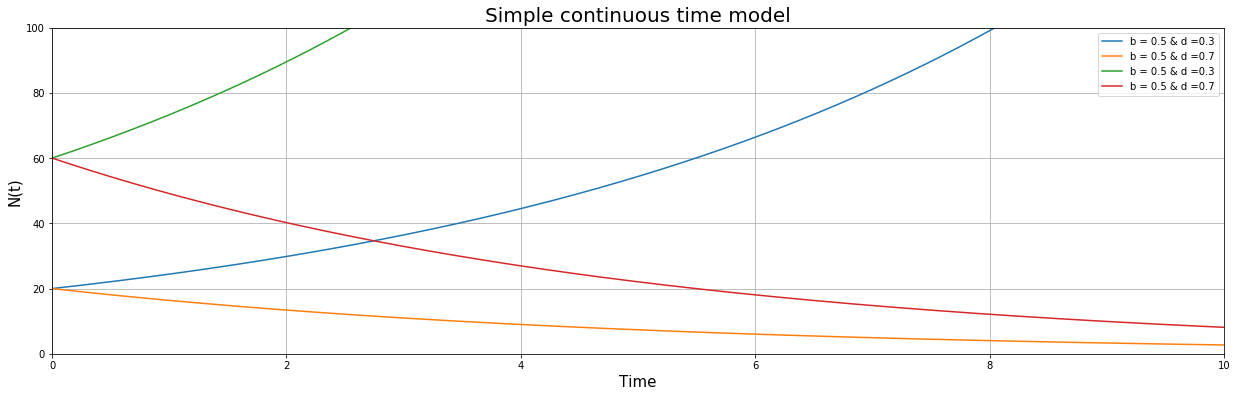

In [6]:
N0=np.array([20,60]); ## Initial Conditions
b=0.5; ## Birth rate
d=np.array([0.3,0.7]); ## Death rate 

plt.figure(figsize=(21, 6));
plt.figure(1)

for jj in N0:
    for ii in d:
        tvec=np.linspace(0,10,10**3);
        Nt=jj*np.exp((b-ii)*tvec);

        plt.figure(1)
        plt.plot(tvec,Nt,label='b = 0.5 & d =' +str(ii))
        
plt.axis([0, 10, 0, 100]);
plt.legend(loc='best');
plt.grid();
plt.xlabel("Time", fontsize=15); 
plt.ylabel("N(t)", fontsize=15); 
plt.title("Simple continuous time model", fontsize=20);

Fate of the population depends on the balance between b and d: 
- If b > d, the population grows exponentially.
- If b < d, the population dies out. 

### Logistic equation

A pure exponential growth can make sense at short times, but cannot be possibly true for all times. In the real world, the enviorment usually puts some limit to the population it can sustain, determined by the availability of sustaining resources. The logistic equation can represent this capacity limitation.

$$\frac{dN}{dt} = rN(1-N/K)$$

Where $r (1-N/K)$ is the reposition rate. For N > K, the population decreases. The logistic equation solution is:

$$N(t) = \frac{N_0Ke^{rt}}{K+N_0(e^{rt}-1)} \longrightarrow \mbox{K as t} \longrightarrow \infty$$


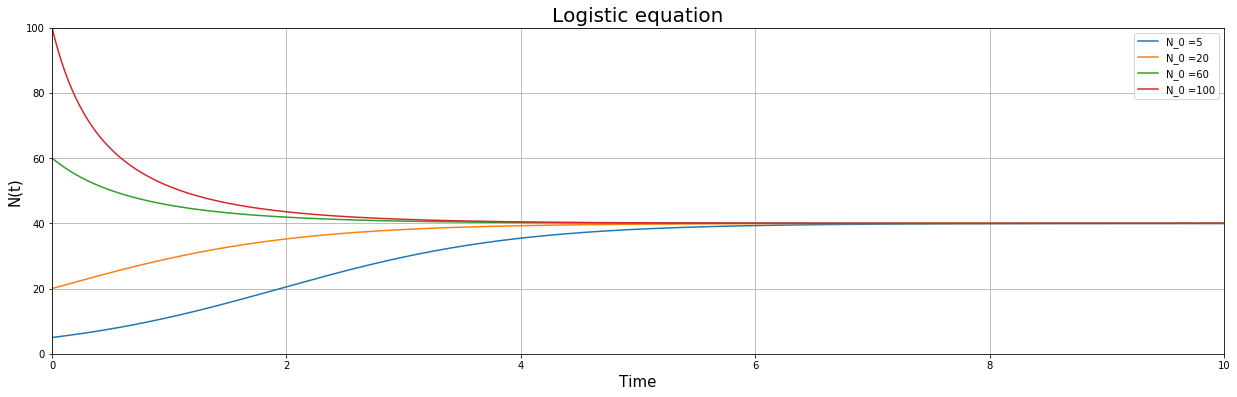

In [7]:
N0=np.array([5,20,60,100]); ## Initial Conditions
K=40; ## Carrying capacity
r=1; ## Growth rate

plt.figure(figsize=(21, 6));
plt.figure(1)

for jj in N0:

    tvec=np.linspace(0,10,10**3);
    Nt=(jj*K*np.exp(r*tvec))/(K+jj*(np.exp(r*tvec)-1));

    plt.figure(1)
    plt.plot(tvec,Nt,label='N_0 =' +str(jj))

plt.axis([0, 10, 0, 100]);
plt.legend(loc='best');
plt.grid();
plt.xlabel("Time", fontsize=15); 
plt.ylabel("N(t)", fontsize=15); 
plt.title("Logistic equation", fontsize=20);

### The delayed logistic equation
The birth rate is considered to act instantaneously. As soon as an individual is born, it can have offsprings. Realistically, there may be a time delay to take account of the time to reach maturity, the finite gestation period, etc. Delay diferential equation:

$$\frac{dN}{dt} = rN(t)\Bigg[ 1-\frac{N(t-T)}{K}\Bigg]$$

The regulatory effect at time t depends on the population at an earlier time, t-T. Delayed differential equations can have surprising behavior, very different from ordinary differential equations. Analytical solution is quite complex, so let’s look at a numerical solution.

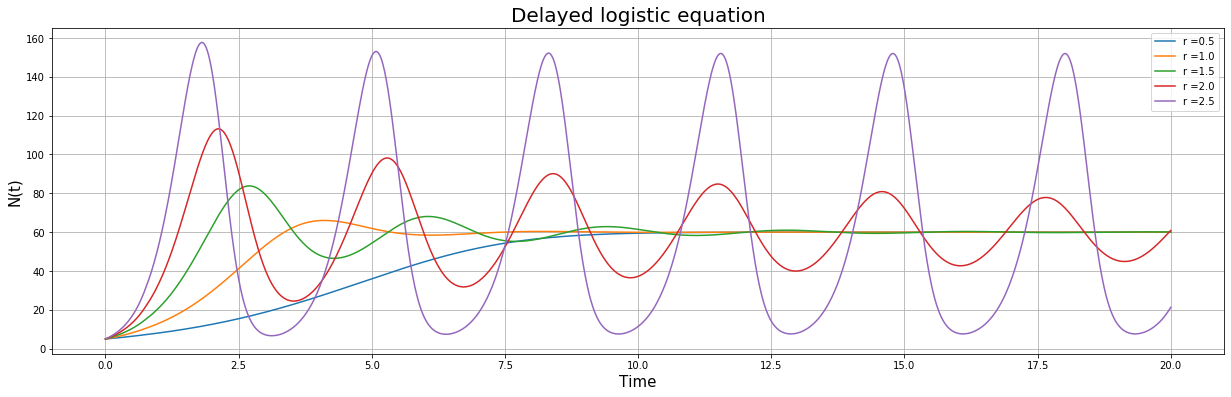

In [9]:
dt=0.01; t=20.0; ST=int(t/dt); ## Euler parameters
K=60.0; T=int(0.75/dt); ## System parameters
r=np.linspace(0.5,2.5,5);

plt.figure(figsize=(21, 6));
plt.figure(1);

for ii in r:
    
    Nvec=np.zeros((ST,1)); ## Trajectory Vector
    N0=5.0;
    
    for jj in range(ST): ## Time Loop
    
        if jj < T: 
            Nvec[jj]=N0;
            dN=ii*Nvec[jj]*(1-1/K) ## Dynamics
            N0=N0+dt*dN
        else:
            Nvec[jj]=N0;
            dN=ii*Nvec[jj]*(1-Nvec[jj-T]/K) ## Dynamics
            N0=N0+dt*dN

    plt.figure(1);
    plt.plot(np.linspace(0,t,ST),Nvec,label='r =' +str(ii));

plt.legend(loc='best');
plt.grid();
plt.xlabel("Time", fontsize=15); 
plt.ylabel("N(t)", fontsize=15); 
plt.title("Delayed logistic equation", fontsize=20);
    
    
